<a href="https://colab.research.google.com/github/Elias-VA/Practica_Python/blob/main/Red_Neuronal_Atractora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ingrese la dirección de la imagen:/content/drive/MyDrive/Poyecto_tesis_Licenciatura/Imagenes_replicar/Tercer_tomo/Muestra_Andesita_1589.png


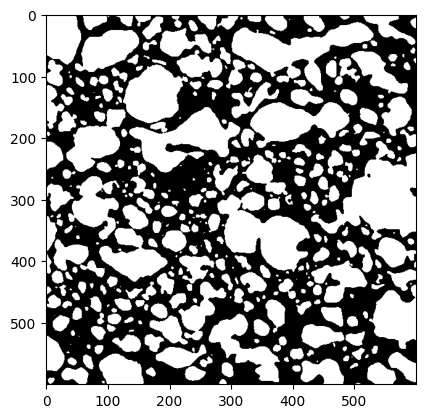

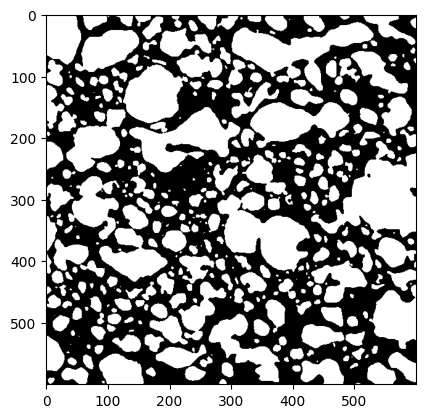

-1 1


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.stats import bernoulli


def create_network(num_nodes = 100, p_conection=0.5):
    network = []
    weights_matrix = []
    for _ in range(num_nodes):
        neighbors = bernoulli.rvs(p_conection, size=num_nodes)
        neighbors = np.where(neighbors==1)[0]
        #conexiones de la neurona
        network.append(neighbors)
        #pesos de las conexiones
        weights_matrix.append(np.zeros(len(neighbors)))

    return network,weights_matrix


#aprender un patron dado una red y el patrón
def learn(network,weights_matrix,pattern):
    #voy a recorrer los vecinos de cada nodo
    for i,neighbors in enumerate(network):
        #hebbian learning
        weights_matrix[i] += pattern[neighbors] * pattern[i]



#las neuronas utilizarán los pesos para reconstruir la imagen
def evolve(network, weights_matrix, current_state):
    new_state = np.zeros(len(current_state))
    #voy a recorrer los vecinos de cada nodo
    for i,neighbors in enumerate(network):
        #índicees de los vecinos
        #cambio de estado
        new_state[i] = sum(current_state[neighbors]*weights_matrix[i])
        if(new_state[i]<0):
            new_state[i] = -1
        else:
            new_state[i] = 1
    return new_state




img = cv2.imread(input('Ingrese la dirección de la imagen:'))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img,'gray')
plt.show()

img.shape

img = cv2.resize(img,(600,600))




threshold = img.mean()
threshold


img[np.where(img<threshold)]= 0
img[np.where(img>=threshold)]= 1



img = np.array(img, dtype='int8')
img[np.where(img==0)]= -1

plt.imshow(img,'gray')
plt.show()


print(np.min(img),np.max(img))

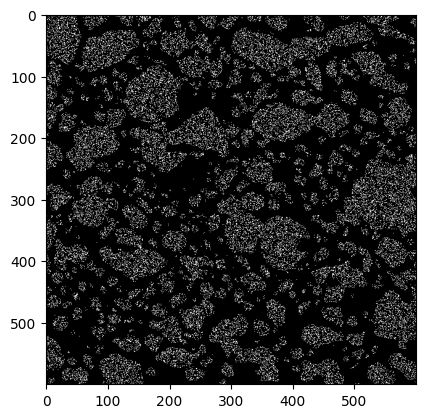

In [ ]:
img.mean()
flat_img = np.resize(img,img.size)



"""Aprender Patron"""
network,weights_matrix = create_network(num_nodes=len(flat_img),p_conection=0.01)

len(network)

learn(network,weights_matrix,flat_img)


"""Probar el aprendizaje"""


random_img = flat_img.copy()

noise = bernoulli.rvs(0.8, size=len(random_img))

random_img[np.where(noise==1)]=-1

noise_img = np.resize(random_img,img.shape)

plt.imshow(noise_img, 'gray')
plt.show()

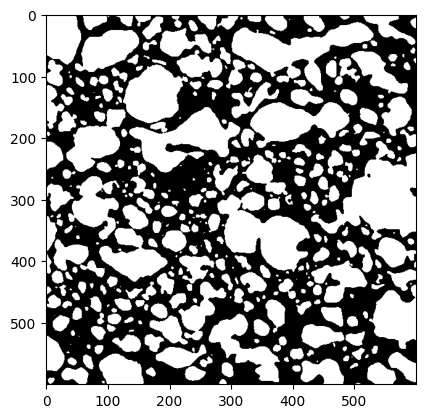

(600, 600)

In [ ]:
# Generamos la matriz de la imagen replicada a partir de la imagen con ruido
new_state = evolve(network, weights_matrix, random_img)

# Observamos las dimensiones de la matriz de la imagen generada por la red neuronal, la cual está todavía "aplanada"
new_state.shape

# Redimensionamos la imagen generada por la red neuronal, al mismo tamaño de la imagen original que deseamos replicar.
new_img = np.resize(new_state,img.shape)

# Visualizamos la imagen generada "new_img", ya redimensionada, en escala de grises.
plt.imshow(new_img, 'gray')
plt.show()

# Observamos las dimensiones de la imagen generada ya redimensionada
new_img.shape

In [ ]:
"""Comparacion entre la imagen original y la imagen generada"""

# Se define la función de comparación
def compare(original,result):
    return sum(original*result)/len(original)

# Se compara las matrices de ambas imágenes, la original y la reconstruida
# Si el resultado es 100, entonces la reconstrucción fue perfecta.
compare(flat_img, new_state)



1.0

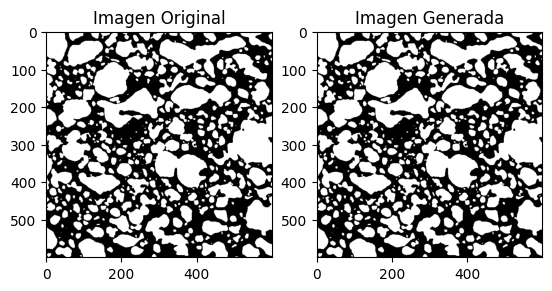

In [ ]:
"""Visulizacion de las imagenes """
# Visualizamos la imagen original
plt.subplot(1,2,1)
plt.imshow(img, 'gray')
plt.title('Imagen Original')

# Visualizamos la imagen generada
plt.subplot(1,2,2)
plt.imshow(new_img, 'gray')
plt.title('Imagen Generada')
plt.show()

In [ ]:
"""Binarizando la imagen de 0 y 1"""
# Transformar -1 a 0 en img y new_img
img[img == -1] = 0
new_img[new_img == -1] = 0

In [ ]:
"""Calculo de la porosidad"""

#Porosidad imagen original
phi_fuente = np.sum(img ==1) / (np.sum(img == 0) + np.sum(img == 1))
print(f'La porosidad total de la imagen original es {phi_fuente}')
print(f"La porosidad total en porcentaje de la imagen original es {phi_fuente*100}% \n")


#Porosidad imagen replicada
phi_creada = np.sum(new_img ==1) / (np.sum(img == 0) + np.sum(img == 1))
print(f'La porosidad total de la imagen replicada es {phi_creada}')
print(f"La porosidad total en porcentaje de la imagen replicada es {phi_creada*100}% \n")




"""Calculo de errores de imagenes"""
#Error absoluto medio (Promedio de las diferencias)
diferencia_absoluta = np.abs(img - new_img)
suma_diferencias = np.sum(diferencia_absoluta)

total_pixeles= np.sum(img == 0) + np.sum(img == 1)
promedio_diferencia = suma_diferencias / total_pixeles
print(f"El promedio de las diferencias es : {promedio_diferencia}", "\n")

#Error relativo
error_relativo = (np.abs(np.sum(img) - np.sum(new_img))) / np.abs(np.sum(img))
error_relativo_porcentaje = error_relativo * 100
print(f'El error relativo de la imagen creada es {error_relativo}')
print(f'El error relativo en porcentaje de la imagen creada es {error_relativo_porcentaje}% \n')


"""Calculo de errores de la porosidad"""

#Diferencia de porosidades
error_absoluto_phi = np.abs(phi_fuente - phi_creada)
print(f'El la diferencia entre las porosidades es {error_absoluto_phi} \n')

#Error relativo
error_relativo_phi = error_absoluto_phi / phi_fuente
print(f'El error relativo de la porosidad es {error_relativo_phi}')

La porosidad total de la imagen original es 0.5157833333333334
La porosidad total en porcentaje de la imagen original es 51.57833333333334% 

La porosidad total de la imagen replicada es 0.5157833333333334
La porosidad total en porcentaje de la imagen replicada es 51.57833333333334% 

El promedio de las diferencias es : 0.0 

El error relativo de la imagen creada es 0.0
El error relativo en porcentaje de la imagen creada es 0.0% 

El la diferencia entre las porosidades es 0.0 

El error relativo de la porosidad es 0.0


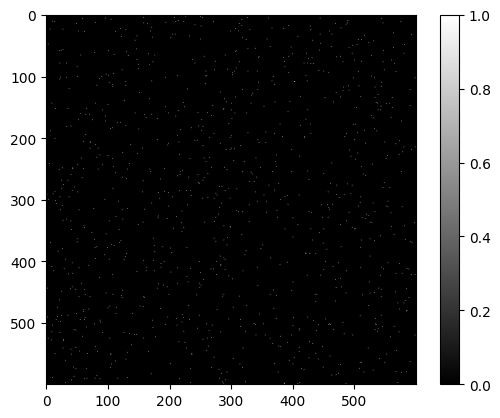

In [ ]:
"""Imagen diferencia"""
diferencia = np.abs(img - new_img)
plt.imshow(diferencia, 'gray')
plt.colorbar()
plt.show()

In [ ]:
print(np.sum(img == 0))
print(np.sum(img == 1))


print(np.sum(new_img == 0))
print(np.sum(new_img == 1))

172971
187029
172943
187057
